In [10]:
import numpy as np
import pandas as pd
from numpy.linalg import eig
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

In [11]:
testing_df = pd.read_csv('./usps.test',header=None)
X_testing,  y_testing  = testing_df.loc[:,1:],  testing_df.loc[:,0]

training_df = pd.read_csv('./usps.train',header=None)
X_training, y_training = training_df.loc[:,1:], training_df.loc[:,0]

validate_df = pd.read_csv('./usps.valid',header=None)
X_validate, y_validate = validate_df.loc[:,1:], validate_df.loc[:,0]

X_train = np.array(X_training)
X_valid = np.array(X_validate)
X_test = np.array(X_testing)

y_train = np.array(y_training)
y_valid = np.array(y_validate)
y_test = np.array(y_testing)

covarinace = np.matmul(X_train.transpose(), X_train)
eigenValues, eigenVectors = eig(covarinace)


256


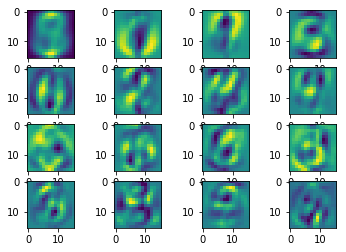

In [12]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:, i]) for i in range(len(eigenValues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print(len(eig_pairs))
for i in range(0,16):
    mat = eig_pairs[i][1].reshape(16, 16)
    plt.subplot(4, 4, i+1)
    plt.imshow(mat)
plt.show()
#print(eig_pairs)

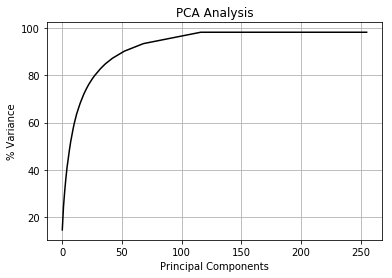

In [13]:
#variance plot
covariance_matrix = PCA(n_components=None)
modes = covariance_matrix.fit(X_train)
variance = modes.explained_variance_ratio_
var = np.cumsum(np.round(-np.sort(-variance), decimals=3) * 100)
plt.grid()
plt.title('PCA Analysis')
plt.ylabel('% Variance')
plt.xlabel('Principal Components')
plt.plot(var, color='k')
plt.show()
#print(np.sort(variance))

In [14]:
#feature Selection
pca = PCA(0.7)
pca_fit = pca.fit(X_train)
pca_X = pca_fit.transform(X_train)
x70 = pca.inverse_transform(pca_X)

pca = PCA(0.8)
pca_fit = pca.fit(X_train)
pca_X = pca_fit.transform(X_train)
x80 = pca.inverse_transform(pca_X)

pca = PCA(0.9)
pca_fit = pca.fit(X_train)
pca_X = pca_fit.transform(X_train)
x90 = pca.inverse_transform(pca_X)

#print(var)
flag1=0
flag2=0
flag3=0
for i in range (modes.n_components_):
    if var[i] > 70 and flag1==0:
        k70=i
        print('k70 is:', k70)
        flag1=flag1+1
    
    if var[i] > 80 and flag2==0:
        k80=i
        print('k80 is:', k80)
        flag2=flag2+1
    
    if var[i] > 90 and flag3==0:
        k90=i
        print('k90 is:', k90)
        flag3=flag3+1

k70 is: 17
k80 is: 28
k90 is: 52


In [15]:
alpha = [0.0001, 0.001, 0.01, 0.1]

def predictLabels(a, X_newTrain, X, eigenVectors, features):
    for a in alpha:
        clf = SGDClassifier(alpha=a, loss='hinge', penalty='l2', max_iter=1000, tol=-np.infty).fit(X_newTrain, y_train)
        y_predict = clf.predict(X)

    return y_predict

In [16]:
def predictLabels_k100(a, X_newTrain, X, eigenVectors):
    for a in alpha:
        clf = SGDClassifier(alpha=a, loss='hinge', penalty='l2', max_iter=1000, tol=-np.infty).fit(X_newTrain, y_train)
        y_predict = clf.predict(X)

    return y_predict

In [17]:
def predictError(y_true, y_predict):
    c = 0
    lengthOfy = len(y_true)
    for i in range(0, lengthOfy):
        if y_true[i] != y_predict[i]:
            c = c + 1

    return (c/lengthOfy)

In [18]:
#validation error
validationError = dict()
for i in alpha:
    y_predict = predictLabels(i, x70, X_validate, eigenVectors, k70)
    validationError['k70', i] = predictError(y_valid, y_predict)

for i in alpha:
    y_predict = predictLabels(i, x80, X_validate, eigenVectors, k80)
    validationError['k80', i] = predictError(y_valid, y_predict)
    
for i in alpha:
    y_predict = predictLabels(i, x90, X_validate,eigenVectors, k90)
    validationError['k90', i] = predictError(y_valid, y_predict)
    
for i in alpha:
    y_predict = predictLabels_k100(i, X_train, X_validate, eigenVectors)
    validationError['k100', i] = predictError(y_valid, y_predict)

print('Validation Error\n',validationError)

Validation Error
 {('k70', 0.0001): 0.13, ('k70', 0.001): 0.12666666666666668, ('k70', 0.01): 0.12, ('k70', 0.1): 0.12666666666666668, ('k80', 0.0001): 0.09, ('k80', 0.001): 0.09666666666666666, ('k80', 0.01): 0.09333333333333334, ('k80', 0.1): 0.09333333333333334, ('k90', 0.0001): 0.07666666666666666, ('k90', 0.001): 0.07666666666666666, ('k90', 0.01): 0.08, ('k90', 0.1): 0.08, ('k100', 0.0001): 0.07666666666666666, ('k100', 0.001): 0.08333333333333333, ('k100', 0.01): 0.07333333333333333, ('k100', 0.1): 0.08333333333333333}


In [10]:
#Test Error
testError = dict()
for i in alpha:
    y_predict = predictLabels(i, x70, X_test,eigenVectors, k70)
    testError['k70', i] = predictError(y_test, y_predict)
    
for i in alpha:
    y_predict = predictLabels(i, x80, X_test, eigenVectors, k80)
    testError['k80', i] = predictError(y_test, y_predict)
    
for i in alpha:
    y_predict = predictLabels(i, x90, X_test,eigenVectors, k90)
    testError['k90', i] = predictError(y_test, y_predict)

for i in alpha:
    y_predict = predictLabels_k100(i, X_train, X_test,eigenVectors)
    testError['k100', i] = predictError(y_test, y_predict)
    
print('Test Error\n',testError)

Test Error
 {('k70', 0.0001): 0.12333333333333334, ('k70', 0.001): 0.12666666666666668, ('k70', 0.01): 0.12, ('k70', 0.1): 0.12333333333333334, ('k80', 0.0001): 0.1, ('k80', 0.001): 0.1, ('k80', 0.01): 0.1, ('k80', 0.1): 0.10333333333333333, ('k90', 0.0001): 0.1, ('k90', 0.001): 0.1, ('k90', 0.01): 0.09666666666666666, ('k90', 0.1): 0.09666666666666666, ('k100', 0.0001): 0.10333333333333333, ('k100', 0.001): 0.1, ('k100', 0.01): 0.1, ('k100', 0.1): 0.1}
